## ENSE 496AD - Lab 3 - k-Nearest Neighbour and k-Means Clustering

In this lab you will implement the k-Nearest Neighbour and k-Means Clustering algorithms.

k-Nearest Neighbor is a regression algorithm which returns the average value of the k-closest samples to a target sample. You will implement two versions of this algorithm, a simple version which returns only the average, and a weighted variant in which the averages are scaled based on the inverse of the distance to the sample.

k-Means Clustering in an unsupervised learning algorithm in which you group the dataset into a number of clusters based on their proximity to cluster centers. This algorithm is trained iteratively, where the cluster groups and cluster centers are updated over a number of iterations.

These algorithms have little in common except they both have "k" in their names, are both very popular machine learning algorithms, and they make both use of distance functions. Due to the common approaches, they have been grouped together for this lab. Another difference is that the k in k-nearest neighbours refers to the number of neighbours, and k in k-Means Clustering refers to the number of cluster centers.

In this lab you will implement and verify the algorithms using a synthetic dataset. You will then apply what you learned to a real world dataset.

Import numpy and matplotlib.

In [969]:
#your code here#your code here
import numpy as np

This toy dataset will be used to verify correct operation of your algorithms

In [1258]:
# toy dataset of pets. length and height in cm, mass in kg.
                     #length, height,
X_train = np.array([[    107,     91],  # bernese
                    [    122,     44],  # great dane
                    [    107,     81],  # goldie
                    [     64,     56],  # beagle
                    [     38,     25],  # sphynx
                    [     36,     25],  # siamese
                    [     44,     25],  # persian
                    [     41,     30]]).astype(float) # manx

                   #mass
Y_train = np.array([[52],
                    [79],
                    [34],
                    [24],
                    [ 6],
                    [ 5],
                    [ 5],
                    [ 5]]).astype(float)

x_test   = np.array([[ 30, 30]]).astype(float)
x_test_2 = np.array([[ 80, 60]]).astype(float)
x_test_3 = np.array([[100, 80]]).astype(float)

### Part 1: K-Nearest Neighbour (30 Marks)

In this portion of the workbook you will implement K-Nearest Neighbor regression algorithm.

Using MatPlotLib, create a scatter plot the training set with the first column on the X-axis and the second column on the Y-axis 

In [1099]:
#your code here
import matplotlib.pyplot as plt

Implement a vectorized Manhattan Distance function here for two numpy arrays.

$\sum_{i=1}^n |x_i-y_i|$

Arguments:
- X_train is a 2D numpy array with multiple rows.
- x_test is a 2D array with a single row.

Returns: 
A column vector which is the manhattan distance between each row of X_train to the single row of x_test   

You may wish to make use of: 
 - broadcasting
 - summing along axes
 - converting 1D to 2D arrays
 - taking the Transpose

It is important you vectorize this function to speed up training time for later sections

In [1100]:
def manhattan (X_train, x_test):
    result = np.sum(abs(x_test - X_train),axis =1,keepdims= True)
    return result
    #your code here

Test Cell

Call:

~~~
print (manhattan(X_train, X_test))
~~~

Expected Output:
~~~
[[138.]
 [106.]
 [128.]
 [ 60.]
 [ 13.]
 [ 11.]
 [ 19.]
 [ 11.]]
 ~~~

In [1101]:
print (manhattan(X_train, x_test))

[[138.]
 [106.]
 [128.]
 [ 60.]
 [ 13.]
 [ 11.]
 [ 19.]
 [ 11.]]


Implement a vectorized euclidean distance function here with the same interface as the previous function. 

$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$

Vectorizing this function will greatly increase training speed later on.

In [1102]:
def euclidean (X_train, x_test):
    xMinusYSquare = np.power(abs(X_train - x_test),2)
    sumOfxy = np.sum(xMinusYSquare,axis=1, keepdims= True)
    return np.power(sumOfxy,0.5)
    #your code here

Test Cell

Call:

~~~
print(euclidean(X_train, X_test))
~~~

Expected Output
~~~
[[98.23441352]
 [93.05912099]
 [92.35799911]
 [42.80186912]
 [ 9.43398113]
 [ 7.81024968]
 [14.86606875]
 [11.        ]]
 ~~~

In [1103]:
print(euclidean(X_train, x_test))
#result = euclidean(X_train, x_test)
                     

[[98.23441352]
 [93.05912099]
 [92.35799911]
 [42.80186912]
 [ 9.43398113]
 [ 7.81024968]
 [14.86606875]
 [11.        ]]


Implement the k-Nearest Neighbours function below

Arguments:
- X_train - The dataset from which the k-Nearest Neighbours will be found
- Y_train - The output value column for the dataset
- x_test - The test sample for which we wish to find Neighbours
- DistanceFunction - a function which computes the distances. We can pass in the manhattan or euclidean functions from before. This function will be called directly in this function  
- k - the number of neighbors to return.

Returns:
A 2D numpy matrix with k rows corresponding to the k-Nearest Neighbors. Include in this matrix:
- The first column should be the distances
- The middle columns should be the X_train values for the nearest samples
- The final column should be the Y_train values for the nearest samples

Example, if X\[n\] is the nearest sample:

|distance|X\[n,0\]|X\[n,1\]|Y\[n\]  |
|---|---|---|---|
|11. |36. |25. |5.  |
|   |   |   |   |

     

Hint:

One possible approach is to compute all of the distances as a column vector, concatenate X-Train to this matrix, append Y-train to this matrix, then sort by the distance column. Finally, return the first k samples, ie. the k samples with the lowest distance.

Example code for sorting based on the first column:
~~~
distances = distances[distances[:,0].argsort()]
~~~

In [1104]:
def kNearestNeighbours (X_train, Y_train, x_test, DistanceFunction, k):
    distances = DistanceFunction(X_train, x_test)
    distances = np.concatenate((distances,X_train,Y_train),axis = 1)
    distances = distances[distances[:,0].argsort()]
    return distances[0:k]
    #your code here

Test Cell

Call:

~~~
kNN = kNearestNeighbours(X_train, Y_train, x_test, manhattan, 3)
print (kNN)
~~~

Expected Output
~~~
[[11. 36. 25.  5.]
 [11. 41. 30.  5.]
 [13. 38. 25.  6.]]
~~~

In [1105]:
kNN = kNearestNeighbours(X_train, Y_train, x_test, manhattan, 3)
print (kNN)

[[11. 36. 25.  5.]
 [11. 41. 30.  5.]
 [13. 38. 25.  6.]]


Implement predictkNN

Arguments:
- kNN - the k-Nearest Neighbours matrix returned from the previous function, which includes the distances (first column), sample inputs (middle columns), and sample outptus (last column).

Returns:
The prediction for the test sample based on the k-Nearest Neihbours matrix, that is, the unweighted average of the output samples 

In [1106]:
def predictkNN (kNN):
    allmean = np.mean(kNN, axis=0)
    i = len(allmean)-1
    result = np.mean(kNN, axis=0)[i]
    return result
    #your code here

Test Cell

Call:

~~~
print(predictkNN(knn))
~~~

Expected Output
~~~
5.333333333333333
~~~

In [1107]:
print(predictkNN(kNN))


5.333333333333333


Implement predictWeightedkNN

Arguments:
- kNN - the k-Nearest Neighbours returned from the previous function

Returns:
The prediction for the test sample based on the k-Nearest Neihbours matrix, however, this time the result should be weighted based on the distances to the k nearest neighbours.

Hint:
First compute the inverse of the distance column. This will be the weights for each output. Next, normalize the weights so that the values add up to one - that is, find the sum of the weights and divide each weight by the sum. Finally, compute the weighted average by elementwise multiplication with the weights and the outputs, summing all values.

Note: This function will fail if a distance evaluates to zero. You could protect against this by adding a small value to each distance before inverting for numerical stability, eg. 0.00000000001, but for consistent results we will omit this.

In [1108]:
def predictWeightedkNN (kNN):
    a=np.array(kNN)
    num_rows, num_cols = a.shape
    for i in range(len(kNN)):
        if kNN[i,0] == 0:
            kNN[i,0] = 1
    #print(kNN)
    kNN[:,0] = 1/(kNN[:,0])
    sumOfDistance = np.sum(kNN,axis = 0)[0]
    
    if sumOfDistance == 0:
        return 10000
    else:
        kNN[:,0] = kNN[:,0]/sumOfDistance
    result = np.sum(kNN[:,0]*kNN[:, (num_cols-1)])
    return result
    #your code here

Test Cell

Call:

~~~
kNN = kNearestNeighbours(X_train, Y_train, x_test, manhattan, 3)
print ("Sample 1: Unweighted vs Weighted, k=3")
print (predictkNN(kNN))
print (predictWeightedkNN(kNN))
print ()
print ("Sample 2: Manhattan vs Euclidean, k=3")
kNN = kNearestNeighbours(X_train, Y_train, x_test_2, manhattan, 3)
print (predictWeightedkNN(kNN))
kNN = kNearestNeighbours(X_train, Y_train, x_test_2, euclidean, 3)
print (predictWeightedkNN(kNN))
print ()
print ("Sample 3: Unweighted vs Weighted, k=4")
kNN = kNearestNeighbours(X_train, Y_train, x_test_3, euclidean, 4)
print (predictkNN(kNN))
print (predictWeightedkNN(kNN))

~~~

Expected Output
~~~
Sample 1: Unweighted vs Weighted, k=3
5.333333333333333
5.297297297297297

Sample 2: Manhattan vs Euclidean, k=3
31.846655791190862
32.524575172899034

Sample 3: Unweighted vs Weighted, k=4
47.25
42.36444395783339
~~~

In [1109]:
kNN = kNearestNeighbours(X_train, Y_train, x_test, manhattan, 3)
print ("Sample 1: Unweighted vs Weighted, k=3")
print (predictkNN(kNN))
print (predictWeightedkNN(kNN))
print ()
print ("Sample 2: Manhattan vs Euclidean, k=3")
kNN = kNearestNeighbours(X_train, Y_train, x_test_2, manhattan, 3)
print (predictWeightedkNN(kNN))
kNN = kNearestNeighbours(X_train, Y_train, x_test_2, euclidean, 3)
print (predictWeightedkNN(kNN))
print ()
print ("Sample 3: Unweighted vs Weighted, k=4")
kNN = kNearestNeighbours(X_train, Y_train, x_test_3, euclidean, 4)
print (predictkNN(kNN))
print (predictWeightedkNN(kNN))


Sample 1: Unweighted vs Weighted, k=3
5.333333333333333
5.297297297297297

Sample 2: Manhattan vs Euclidean, k=3
31.846655791190862
32.524575172899034

Sample 3: Unweighted vs Weighted, k=4
47.25
42.36444395783339


### Part 2: K-Means Clustering (40 Marks)

It this portion of the workbook you will implement the K-Means Clustering algorithm


Assign

This function takes the input array and assigns each sample to the nearest cluster center

Arguments:
- X_train - The Training Set in a 2D numpy array
- cluster_centers - A 2D numpy array of cluster centers already initialized
- DistanceFunction - One of the distance functions previously defined

Returns: A 3D numpy array
- The first dimension is the index of the cluster_center to which this point is the closest
eg. if the sample is the closest to cluster_center\[0\], it will be in index \[0,,\]
- The second and third dimensions are same format as in the training set, with rows being samples and columns being features

In other words, this function partitions the training data into several "sheets" based on which cluster_center they are closest to, represented by the first index in a 3D array. It's worth noting that these "sheets" will not always have the same number of samples, so it's not really a true 3D matrix, an Numpy may struggle to print this data structure neatly during debugging. 

You do not need to Vectorize any of the remaining functions.

In [1273]:
def assign (X_train, cluster_centers, DistanceFunction):
    #get column and rows of cluster_center
    a = np.array(cluster_centers)
    b = np.array(X_train)
    num_rows, num_cols = a.shape
    num_Xrows, num_Xcols = b.shape

    """allDistances = np.empty([8,0],float)
    distances = euclidean(X_train, cluster_centers[0])  
    distances1 = euclidean(X_train, cluster_centers[1])  
    allDistances =np.append(allDistances,distances,axis=1)
    allDistances =np.append(allDistances,distances1,axis=1) 
    print(allDistances)"""
    allDistances = np.empty([len(X_train),0],float)
    for row in range(num_rows):
        distances = euclidean(X_train, cluster_centers[row])
        allDistances =np.append(allDistances,distances,axis=1)
    #print(allDistances)
    c = np.argmin(allDistances,axis=1)  
    #print(c)
    result =[]
    for row in range(num_rows):
        result.append([]) 
    for index in range(len(c)):
        result[c[index]].append(X_train[index,:])
    #it may have empty assign, assign to its cluster
    for i in range(len(result)):
        if result[i] == []:
            result[i] = [cluster_centers[i]]
    result = np.array(result)
    return result
        
    
    #your code here

Test Cell

Call:

~~~
cluster_centers = np.array([[  1,  1],
                            [100, 80]]).astype(float)
print (assign(X_train, cluster_centers, euclidean))
~~~

Expected Output
~~~
[[[ 38.  25.]
  [ 36.  25.]
  [ 44.  25.]
  [ 41.  30.]]

 [[107.  91.]
  [122.  44.]
  [107.  81.]
  [ 64.  56.]]]
~~~

In [1274]:
#cluster_centers = np.array([[  1,  1],
 #                          [100, 80]]).astype(float)
"""cluster_centers = np.array([[  1,  1],
                           [100, 80],
                           [100,50],
                           [100,60],
                           [40,60]]).astype(float)"""
print (assign(X_train, cluster_centers, euclidean))



[list([array([1., 1.])]) list([array([107.,  91.]), array([107.,  81.])])
 list([array([122.,  44.])]) list([array([100.,  60.])])
 list([array([64., 56.]), array([38., 25.]), array([36., 25.]), array([44., 25.]), array([41., 30.])])]


k_means_plus_plus

This function smartly initializes the cluster centers based on the following algorithm:
- initialize the first cluster center to the coordinates of the first datapoint in the dataset. Typically this is chosen at random, but using the first one will ensure consistent results.
- initialized the second cluster center to the coordinates of the datapoint which is the highest distance from the first cluster center
- For the third cluster center onwards
  - assign the dataset to the computed cluster centers
  - initialize the new cluster center to the coordinates of the datapoint which is the highest distance overall from its assigned center

You may assume that k will always be greater than or equal to 2

Arguments:
- X_train - The training set in a 2D numpy array
- k - the number of clusters to be found
- DistanceFunction - the distance function to be used for distance computations

Returns:
- A 2D array of cluster centers, with one row for each cluster center.

In [1275]:
def k_means_plus_plus (X_train, k, DistanceFunction):   
    
    """first = np.array(X_train[0])
    distance = DistanceFunction(X_train, first)
    second =  np.array(X_train[np.argmax(distance)])
    cluster_center = np.append(first, second, axis=0)
    cluster_center = cluster_center.reshape(2,2)
    cluster_center = np.array(cluster_center)
    assign(X_train, cluster_center, euclidean)
    assigned = assign(X_train, cluster_center, euclidean)
    assigned = np.array(assigned)
    final_set =[]
    #print(assigned)
    for i in range(k-1):
        assigned = assign(X_train, cluster_center, euclidean)
        assigned = np.array(assigned)
        #initial distance 
        distanceSample = DistanceFunction(assigned[i],cluster_center[0])
        distances = np.zeros(distanceSample.shape)
        for j in range(len(cluster_center)):
            distances = distances + DistanceFunction(assigned[i],cluster_center[j])
        results = np.concatenate((distances,assigned[i]),axis = 1)
        results = results[results[:,0].argsort()]
        results = results[::-1]
        print(results)
    #np.insert(final_set,0,results[0,:],axis =0) """
    #generate first two cluster_centers
    first = np.array(X_train[0])
    distance = DistanceFunction(X_train, first)
    second =  np.array(X_train[np.argmax(distance)])
    cluster_center = np.append(first, second, axis=0)
    cluster_center = cluster_center.reshape(-1,2)
    final_set =[]
    for i in range(k-2):
        assigned = assign(X_train, cluster_center, euclidean)
        assigned = np.array(assigned)
        #print(assigned)
        #initial distance
        for j in range(len(assigned)):
            distanceSample = DistanceFunction(cluster_center[0],assigned[j])
            #print(distanceSample)
            distances = np.zeros(distanceSample.shape)
            for z in range(len(cluster_center)):
                distances = distances + DistanceFunction(cluster_center[z],assigned[j])
            results = np.concatenate((distances,assigned[j]),axis = 1)
            results = results[results[:,0].argsort()]
            results = results[::-1]
            #print(results)
            #store the max value to a set for each cluster
            final_set.append(results[0])
        final_array = np.reshape(final_set,(-1,len(cluster_center[0])+1))  
        final_array = final_array[final_array[:,0].argsort()]
        final_array = final_array[::-1]  
        #print(final_set[0])
        #print(final_set[0,1:len(cluster_center[0])+1])
        new_cluster = final_array[0,1:len(cluster_center[0])+1]
        #print(new_cluster)
        #append new cluster to cluster center
        cluster_center = np.append(cluster_center, [new_cluster], axis=0)
        #print(cluster_center)  
    return cluster_center
    #your code here

Test Cell

Call:

~~~
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
print (cluster_centers)
~~~

Expected Output
~~~
[[107.  91.]
 [ 36.  25.]
 [122.  44.]]
~~~

In [1276]:
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
print (cluster_centers)

[[107.  91.]
 [ 36.  25.]
 [122.  44.]]


plotPointsAndCenters

Write a function called plot which will plot the dataset and the cluster centers on the same plot.

Use the following conventions:

- Use the "point" marker (".") for each of the samples
- Use the "up-arrow" marker ("^") for the cluster centers
- Use the same color for each cluster and cluster center.
- Use the following colors for cluster 0..6
~~~
colors = ["b", "g", "r", "c", "m", "y", "k"]
~~~
eg. cluster index 0 and its datapoints are blue, cluster 1 is green, etc.

Args:
- X_train - The Training Set as a 2D numpy array
- cluster_centers - The cluster centers, as initialized by k-means-plus-plus
- DistanceFunction - the Distance Function used in computing cluster membership

Returns: None


In [1277]:

def plotPointsAndCenters (X_train, cluster_centers, DistanceFunction):
    colors = ["b", "g", "r", "c", "m", "y", "k"]
    counter = 0
    #print(X_train)
    #print(cluster_centers)
    for x1,y1 in X_train:
        distance = DistanceFunction([x1,y1],cluster_centers)
        index = np.argmin(distance,axis=0)   
        index = int(index)
        plt.scatter(x1, y1, marker='.', c=colors[index])
    for x,y in cluster_centers:
        plt.scatter(x, y, marker='^', c=colors[counter])  
        counter =counter + 1
    plt.show()
    #your code here

Test Cell

Call:

~~~
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
plotPointsAndCenters(X_train, cluster_centers, euclidean)
~~~

Expected Output
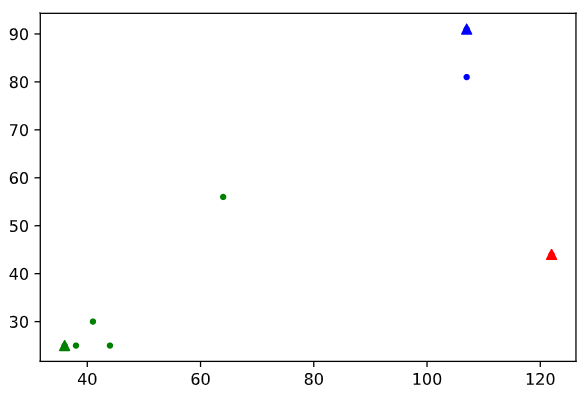

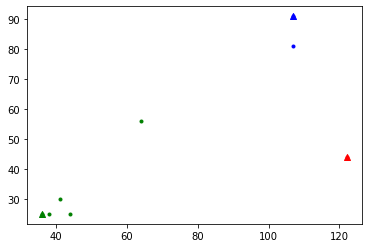

In [1278]:
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
plotPointsAndCenters(X_train, cluster_centers, euclidean)

Update

Write a function which performs one iteration of coordinate descent for K-means, that is, assign each observation to the closest cluster center, then revises the cluster centres using the mean of the assigned observations.

Arguments:
- X_train - The Training Set as a 2D numpy array
- cluster_centers - The cluster centers, after initialization
- DistanceFunction - the Distance Function used in computing cluster membership

Returns:
- cluster_centers - The cluster centers after one iteration of training

In [1279]:
def update (X_train, cluster_centers, DistanceFunction):
    assigned = assign(X_train, cluster_centers, DistanceFunction)
    update_cluster_center = np.empty((len(cluster_centers),len(cluster_centers[0])))
    #print(update_cluster_center)
    for i in range(len(assigned)):
        z = np.mean(assigned[i],axis = 0)
        cluster_centers[i] = z
    #print(cluster_centers)   
    return cluster_centers
    #your code here

Test Cell

Call:

~~~
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
updated_cluster_centers = update(X_train, cluster_centers, euclidean)
plotPointsAndCenters(X_train, updated_cluster_centers, euclidean)
~~~

Expected Output
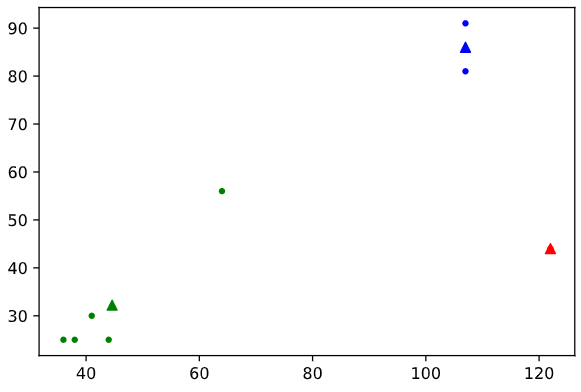

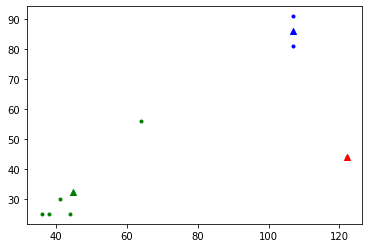

In [1280]:
cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
updated_cluster_centers = update(X_train, cluster_centers, euclidean)
plotPointsAndCenters(X_train, updated_cluster_centers, euclidean)

Model Evaluation - Cluster Heterogenity

Write a function to numerically evaluate our models fit, called Cluster Heterogeneity,  which returns the sum of all of the distances from each point to their cluster center

Arguments:
- X_train - The Training Set as a 2D numpy array
- cluster_centers - The cluster centers, after initialization
- DistanceFunction - the Distance Function used in computing cluster membership

Returns: The sum of all distances from each point to its cluster center


In [1281]:
def cluster_heterogeneity (X_train, cluster_centers, DistanceFunction):
    assigned = assign(X_train, cluster_centers, DistanceFunction)
    dist_sum = 0
    for i in range(len(cluster_centers)):
        distance = DistanceFunction(cluster_centers[i],assigned[i])
        dist_sum = dist_sum + np.sum(distance)
    return(dist_sum)
        
        
    #your code here

Test Cell

Call:
~~~
cluster_heterogeneity(X_train, updated_cluster_centers, euclidean)
~~~

Expected Output:
~~~
73.13236208596943
~~~

In [1282]:
cluster_heterogeneity(X_train, updated_cluster_centers, euclidean)

73.13236208596943

Train

Write a function called train which performs a number of updates corresponding to the provided arguments.
After each update, print the cluster heterogeneity

Arguments:

- X_train - The Training Set as a 2D numpy array
- cluster_centers - The cluster centers, after initialization
- DistanceFunction - the Distance Function used in computing cluster membership
- iterations - the number of updates to be called

Returns:

- cluster_centers - The updated cluster_centers

In [1300]:
def train (X_train, cluster_centers, DistanceFunction, iterations):  
    for i in range(iterations):
        cluster_centers = update(X_train, cluster_centers, DistanceFunction)
    print(cluster_heterogeneity(X_train, cluster_centers, DistanceFunction))
    return cluster_centers
    
    #your code here

Note, this function will not change the output for the previous example, as no points will change clusters in the next iteration. This funcion is only useful for larger datasets as we'll see in the next section

## Part 3: Testing on a Real Dataset (30 Marks)

It's time to test these algorithms on a real world dataset. This dataset (Company_Client.csv) contains Genders, Ages, Annual Income and Spending Scores. Spending Scores indicate how willing an individual is to spend their money, with higher values meaning they spend more, and lower values meaning they save more. Follow along with the cells to analyze the data using the algorithms you created:


import pandas

In [1301]:
#your code here
import pandas as pd

open the CSV

In [1302]:
#your code here
dataframe =  pd.read_csv("Company_Client.csv")
dataframe.head()

,Client_ID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


list the first few rows of the dataset

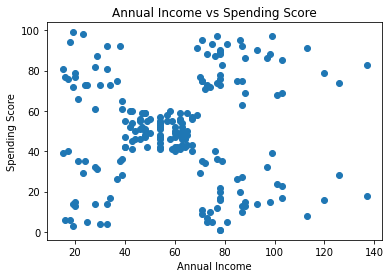

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

In [1303]:
#your code here
x = dataframe["Annual Income (k$)"]
y = dataframe["Spending Score (1-100)"]
plt.scatter(x, y)
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
x.head()
#y.head()

create a scatter plot of the Annual Income vs the Spending Score

In [1304]:
#your code here
x = np.array(x)
x = np.reshape(x,(-1,1))
#print (x)
y = np.array(y)
y = np.reshape(y,(-1,1))

Using weighted K-Nearest Neighbor with the euclidean function, where K=10, predict the expected age of a the person with the following income and spending patterns:

In [1305]:
X_train = x#your code here
Y_train = y#your code here
k = 10#your code here
# Test case 1: Makes big money but doesn't spend it
x_test_1 = np.array([[100, 20]])
# Test case 2: Makes big money and does spend it
x_test_2 = np.array([[100, 80]])
# Test case 3: Doesn't make much money, but spends it
x_test_3 = np.array([[40, 80]])
# Test case 3: Doesn't make much money, and doesn't spends it
x_test_4 = np.array([[20, 20]])

print (predictWeightedkNN(kNearestNeighbours(X_train, Y_train, x_test_1, euclidean, k)))
print (predictWeightedkNN(kNearestNeighbours(X_train, Y_train, x_test_2, euclidean, k)))
print (predictWeightedkNN(kNearestNeighbours(X_train, Y_train, x_test_3, euclidean, k)))
print (predictWeightedkNN(kNearestNeighbours(X_train, Y_train, x_test_4, euclidean, k)))

46.69999375214754
52.634579200522765
46.69997503431808
47.11522368914975


Now we are going to try to cluster our data based on the Annual Income and Spending Score values.

We are going to make 3 models, one with 3 clusters, one with 5 clusters and one with 7 clusters.

Complete the function Evaluate Model below

This function should:
- Initialize the weights with K-means-++
- Perform a number of iterations of updates
- Plot the data
- Compute the final cluster_heterogenity

In [1306]:
def evaluate_model (X_train, k, DistanceFunction, iterations):
    cluster_centers = k_means_plus_plus(X_train, k, DistanceFunction)
    cluster_centers = train(X_train, cluster_centers, DistanceFunction, iterations)
    plotPointsAndCenters(X_train, cluster_centers, DistanceFunction)
    #your code here

Now use your function to create and plot clusters for k=3, k=5 and k=7. Use 10 iterations, though they may not all be necessary.

3899.705512700313


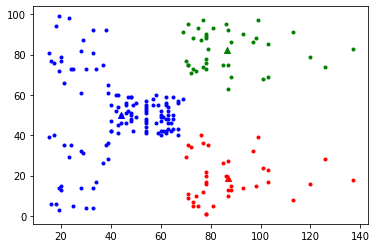

In [1307]:
#your code here
X_train = np.concatenate((x,y),axis = 1)
#evaluate_model(X_train, 3,euclidean , 10)
"""cluster_centers = k_means_plus_plus(X_train, 3, euclidean)
cluster_centers = train(X_train, cluster_centers, euclidean, 10)
plotPointsAndCenters(X_train, cluster_centers, euclidean)"""
evaluate_model (X_train, 3,euclidean , 10)

2604.0252701583486


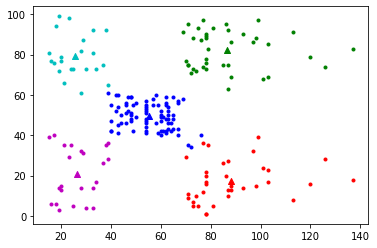

In [1308]:
#your code here
evaluate_model (X_train, 5,euclidean , 10)

2269.809744866629


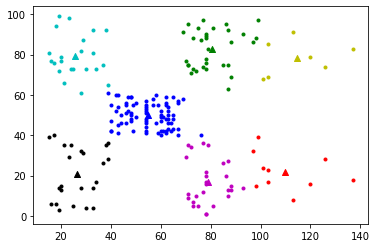

In [1309]:
#your code here
evaluate_model (X_train, 7,euclidean , 10)

Test Cell

Expected Cluster Heterogeneity Values after training, not necessarily in order:
~~~
2600.012523991301
2291.907654431063
3904.2584173001987
~~~

Based on your findings, which is the best model and why?

In [1310]:
#your thoughts here
#When data is very close to each other ,K-Nearest is a beter choice
#When data is located dispersive and each of them was kind of centered, clustering is beter